T: Tịnh tiến
X: Xoay
P: Phóng to
H: Thu nhỏ
C: Coordinate Map


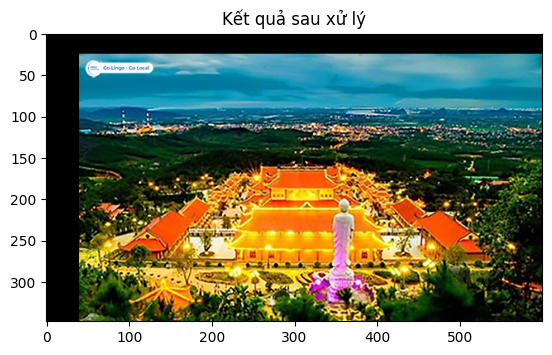

Đã lưu ảnh kết quả vào: hinh2_T.jpg


In [1]:
import numpy as np
import imageio.v2 as iio 
import matplotlib.pylab as plt
import scipy.ndimage as nd

#Đọc 3 hình ảnh được chọn từ trong thư mục exercise
image_path = ("exercise/ha-long-bay-in-vietnam.jpg", "exercise/pagoda.jpg", "exercise/quang_ninh.jpg")
images = [iio.imread(p) for p in image_path]

#Khởi tạo menu người dùng
print("T: Tịnh tiến")
print("X: Xoay")
print("P: Phóng to")
print("H: Thu nhỏ")
print("C: Coordinate Map")
#Kiểm tra nếu người dùng nhập đúng hay không nếu sai thì nhập lại
while True:
    bien_doi = input("Hãy nhập vào phép biến đổi muốn thực hiện: ").strip().upper() #.strip là để loại bỏ các khoảng trắng nếu người dùng nhập dư, và .upper là để in hoa các ký tự
    if bien_doi in ["T", "X", "P", "H", "C"]:
        break
    else:
        print("Ký tự nhập vào không hợp lệ, hãy nhập lại!")
        
while True:
    try:
        chon_hinh = int(input("Chọn hình muốn thực hiện phép biến đổi (1/2/3): ")) - 1
        if 0 <= chon_hinh < 3: #Chỉ hợp lệ nếu người dùng nhập 1/2/3
            break
        else:
            print("Số hình được chọn không hợp lệ, hãy nhập lại!")
    except ValueError: #Trường hợp người dùng không nhập số mà là ký tự
        print("Số được nhập vào phải là một số nguyên!")

img = images[chon_hinh]
output_img = None

#Xử lý theo lựa chọn của người dùng
if bien_doi == "T":
    dx = int(input("Di chuyển hình sang ngang bao nhiêu pixel ?: "))
    dy = int(input("Di chuyển hình sang dọc bao nhiêu pixel ?: "))
    output_img = nd.shift(img, (dx, dy, 0), order=0)
    
elif bien_doi == "X":
    angle = float(input("Xoay hình bao nhiêu độ ?: "))
    output_img = nd.rotate(img, angle, reshape=False)

elif bien_doi == "P":
    factor = float(input("Phóng to hình với hệ số là bao nhiêu ?: "))
    output_img = nd.zoom(img, (factor, factor, 1))

elif bien_doi == "H":
    factor = float(input("Thu nhỏ hình với hệ số là bao nhiêu ?: "))
    output_img = nd.zoom(img, (factor, factor, 1))

elif bien_doi == "C":
    h, w, _ = img.shape
    coords = np.indices((h, w))
    coords[1] = w - coords[1] - 1  #Đảo ngược chiều ngang
    output_img = img[coords[0], coords[1]]
    
#Lưu hình và hiển thị
plt.imshow(output_img)
plt.title("Kết quả sau xử lý")
plt.show()

#Tạo tên file và lưu
out_name = f"hinh{chon_hinh+1}_{bien_doi}.jpg"
iio.imsave(out_name, output_img)
print(f"Đã lưu ảnh kết quả vào: {out_name}")